In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import csv

In [4]:
def f(x):
    return 0.5*np.exp(-(x+3)**2)+np.exp(-x**2)+0.5*np.exp(-(x-3)**2)

In [5]:
N=200
x=np.random.rand(N)*10-5 #[-5,5)
x=np.sort(x)
y=f(x)+0.05*np.random.randn(N)
x.shape=-1,1

In [4]:
ridge=RidgeCV(alphas=np.logspace(-3,2,10),fit_intercept=False)
ridged=Pipeline([('poly',PolynomialFeatures(degree=10)),
                ('Ridge',ridge)])
bagging_ridged=BaggingRegressor(ridged,n_estimators=100,max_samples=0.3)
dtr=DecisionTreeRegressor(max_depth=5)

In [6]:
regs = [('DecisionTree Regressor', dtr),
        ('Ridge Regresssion(6 Degree)', ridged),
        ('Bagging Ridge(6 Degree)', bagging_ridged),
        ('Bagging DecisionTree Regressor',
         BaggingRegressor(dtr, n_estimators=100, max_samples=0.3))]

In [7]:
x_test=np.linspace(1.1*x.min(),1.1*x.max(),1000)

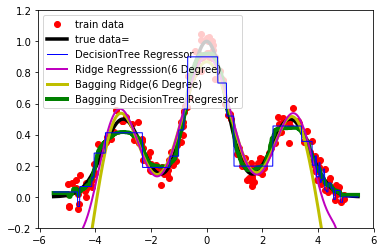

In [15]:
plt.plot(x, y, 'ro', label='train data')
plt.plot(x_test, f(x_test), color='k', lw=3.5, label='true data=')
clrs = 'bmyg'
for i, (name, reg) in enumerate(regs):
    reg.fit(x, y)
    y_test = reg.predict(x_test.reshape(-1, 1))
    plt.plot(x_test,
             y_test.ravel(),
             color=clrs[i],
             lw=i + 1,
             label=name,
             zorder=6 - i)
plt.legend(loc='best')
plt.ylim((-0.2, 1.2))
# plt.tight_layout(2)
plt.show()